In [4]:
from models.research.astronet.light_curve_util import kepler_io
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
%matplotlib inline
font = {        'size'   : 20}
matplotlib.rc('font', **font)

In [5]:
KEPLER_DATA_DIR = "/Volumes/data/kepler/data/"
KEPLER_ID = 11442793  # Kepler-90.

In [6]:
# Read the light curve.
file_names = kepler_io.kepler_filenames(KEPLER_DATA_DIR, KEPLER_ID)
assert file_names, "Failed to find .fits files in {}".format(KEPLER_DATA_DIR)
all_time, all_flux = kepler_io.read_kepler_light_curve(file_names)
print("Read light curve with {} segments".format(len(all_time)))

Read light curve with 14 segments


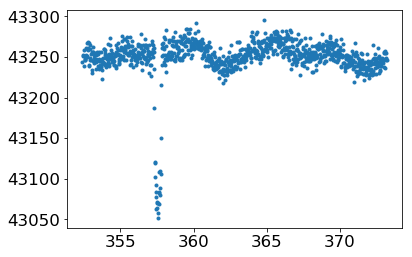

In [8]:
# Plot the fourth segment.
plt.plot(all_time[3], all_flux[3], ".")


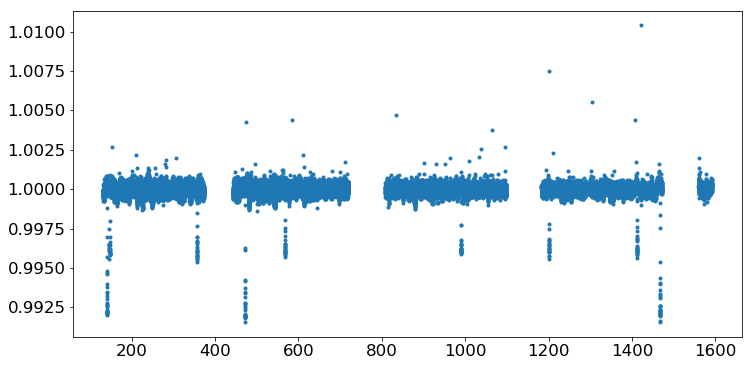

In [10]:
# Plot all light curve segments. We first divide by the median flux in each
# segment, because the segments are on different scales.
for f in all_flux:
  f /= np.median(f)
plt.figure(figsize=(12,6))
plt.plot(np.concatenate(all_time), np.concatenate(all_flux), ".")
